ابتدا در این تابع با ورودی های تعداد وزیر ها و تعداد جمعیت اولیه مورد نظر، به صورت تصادفی جایگشتی از اعداد

1 تا n
خواهیم داشت.

In [54]:
import numpy as np
def data_creation(n, population):

    data = np.zeros((population, n), dtype='int')

    for i in range(population):
        data[i] = np.random.permutation(n)+1
    return data

این تابع، تابع ارزش ما است.
چون کوروموزوم ما به صورت جایگشتی از ستون هر وزیر است، حالتی که ستون یا سطر تکراری داشته باشیم، وجود ندارد. بنابراین تنها کافیست حالت قطری را در نظر بگیریم.
به این صورت که اگر دو وزیر اختلاف سطر و ستون یکسانی داشته باشند، یعنی در یک قطر هستند و در این صورت یکی به مقدار ارزش آن اضافه  می کنیم.
هدف پیدا کردن کمترین مقدار ارزش است.

In [55]:
def fitness(x, n):
    count = 0
    for i in range(n):
        for j in range(i+1, n):
            if abs(i-j)==abs(x[i]-x[j]):
                count = count + 1
    return count

در این تابع برای بار اول ارزش همه جایگشت های تولید شده در لیست داده را حساب می کنیم.

In [56]:
def first_fit_calc(population, data, n):
    fitness_data = np.zeros(population, dtype='int')
    for i in range(population):
        fitness_data[i] = fitness(data[i], n)
    return fitness_data

برای انتخاب والدین برای بازترکیب، از روش انتخاب مسابقه ای استفاده می کنیم.

به این صورت عمل می کنیم که به صورت تصادفی از جمعیت ۳ عضو برداشته و کم ترین مقدار ارزش ( بهترین والد ) را انتخاب می کنیم.

دلیل انتخاب این روش، پویش و انتفاع مناسب است.

In [57]:
def tournament_selection(x, f, p):
    arr = [0, 0, 0]
    for i in range(3):
        arr[i] = np.random.randint(p)
        
    fit = [0, 0, 0]
    for i in range(3):
        fit[i] = f[arr[i]]
        
    return arr[fit.index(min(fit))]

برای بازترکیب، از روش ترکیبی استفاده می کنیم.
زیرا بین روش ترتیبی و روش دوری برای حالت کوروموزوم جایگشتی، راحت تر عمل می کند و جایگشت های بهتری می سازد.

In [58]:
def crossover(x1, x2, n):
    index1 = np.random.randint(n)
    index2 = np.random.randint(n)
    if(index1 > index2):
        index1, index2 = index2, index1
        
    arr1 = np.zeros(n, dtype='int')
    arr2 = np.zeros(n, dtype='int')
    arr1[index1:index2+1] = x1[index1:index2+1].copy()
    arr2[index1:index2+1] = x2[index1:index2+1].copy()
    
    j = index2+1
    k = index2+1
    
    for i in range(n):
        if(not (x1[(index2+1+i)%n] in arr2)):
            arr2[j%n] = x1[(index2+1+i)%n]
            j = j+1
        if(not (x2[(index2+1+i)%n] in arr1)):
            arr1[k%n] = x2[(index2+1+i)%n]
            k = k+1
            
#     print(index1)
#     print(index2)
#     print(arr1)
#     print(arr2)
    return arr1, arr2

برای جهش ابتدا روش درهم سازی در نظر گرفته شد، اما چون جایگشت رو خیلی زیاد تغییر می دهد (جواب ها خوب نبودند )، روش جا به جایی در نظر گرفته شد.

In [59]:
def scramble_mutation(arr, n):
    index1 = np.random.randint(n)
    index2 = np.random.randint(n)
    if(index1 > index2):
        index1, index2 = index2, index1
    t = arr[index1].copy()
    arr[index1] = arr[index2].copy()
    arr[index2] = t
        
#     sub_arr = arr[index1:index2+1]
#     sub_arr = np.random.permutation(sub_arr)
#     arr[index1:index2+1] = sub_arr.copy()
#     print(index1)
#     print(index2)
#     print(arr)
    return arr

این تابع، تابع توقف ما است که بررسی می کند آیا جواب بهتر شده یا خیر.

In [60]:
def stop_condition(fd, c, lm):
    if(min(fd) == 0):
        lm[0] = 0
        return(0)
    
    elif(min(fd) == lm[0]):
        return(0.5)      
    
    elif(min(fd) < lm[0]):
        lm[0] = min(fd)
        return(1)

این تابع، تابع اصلی است که چند بار اجرا شده (دیفالت ۱۰ بار) تا بررسی کند که در اون تعداد بار، چند بار جواب ۰ بدست می آید.

A:
در این بخش آرایه هایی که بعدا جواب ها را داخل آنها قرار می دهیم را می سازیم.

B:
در این قسمت داده های اولیه را ساخته و ارزش آنها را محاسبه می کنیم

C:
در این بخش انتخاب والدین را انجام می دهیم

D:
در این بخش با احتمال ۰.۹۵ با والد های انتخاب شده، بازترکیب انجام می دهیم

E:
در این بخش با احتمال های مختلف، فرزند های تولید شده را جهش می دهیم

F:
در این قسمت والیدن را براساس ارزش آنها مرتب می کنیم

G:
در این قسمت فرزندان را براساس ارزش آنها مرتب می کنیم

H:
در این بخش ۳۰ درصد برتر فرزندان را با ۳۰ درصد ضعیف والدین جا به جا می کنیم (جایگزینی)

In [77]:
def genetic_algorithm(n, population, iteration, s=10):
    res_min = np.zeros(s, dtype='int') #(A)
    res_per = np.zeros((s, n), dtype='int')
    for index in range(s):
        count = 0
        last_min = [100000000]

        data = data_creation(n, population) #(B)
        fitness_data = first_fit_calc(population, data, n)

        while(stop_condition(fitness_data, count, last_min) != 0 and count < iteration):
            if (stop_condition(fitness_data, count, last_min) == 0.5):
                count += 1
            else:
                count = 0

            children = []
            for i in range(int(population/2)):
                arr_index = []
                child = []
                for i in range(2): #(C)
                    z = tournament_selection(data, fitness_data, population)
                    arr_index.append(z)
                chance = np.random.rand()
                if(chance <= 0.95): #(D)
                    child1, child2 = crossover(data[arr_index[0]], data[arr_index[1]], n)
                    child.append(child1)
                    child.append(child2)
                else:
                    child1, child2 = data[arr_index[0]], data[arr_index[1]]
                    child.append(child1)
                    child.append(child2)

                chance = np.random.rand()
                if(chance <= 1/n):   #(E)
#                 if(chance <= 0.2):
#                 if(chance <= 0.5):
                    child[0], child[1] = scramble_mutation(child[0], n), scramble_mutation(child[1], n)
                children.append(child[0])
                children.append(child[1])

            #----------------------------------------------------------------

            for i in range(population): #(F)
                fitness_data[i] = fitness(data[i], n)

            sorted_fitness_data = np.sort(fitness_data)
            sorted_data = np.zeros((population, n), dtype = 'int')

            for i in range(population):
                l = np.where(fitness_data == sorted_fitness_data[i])
                for j in range(len(l)):
                    sorted_data[i+j] = data[l[0][j]].copy()
                i = i + len(l)
            data = sorted_data.copy()
            fitness_data = sorted_fitness_data.copy()

            #-------------------------------------------------------------------

            pop_child = len(children) #(G)
            fitness_data_child = np.zeros(pop_child, dtype = 'int')

            for i in range(pop_child):
                fitness_data_child[i] = fitness(children[i], n)

            sorted_fitness_data_child = np.sort(fitness_data_child)
            sorted_child = np.zeros((pop_child, n), dtype = 'int')

            for i in range(pop_child):
                l = np.where(fitness_data_child == sorted_fitness_data_child[i])
                for j in range(len(l)):
                    sorted_child[i + j] = children[l[0][j]].copy()
                i = i + len(l)
            children = sorted_child.copy()
            fitness_data_child = sorted_fitness_data_child.copy()

            #-------------------------------------------------------------------

            for i in range(int(0.3*(population))): #(H)
                data[-1*(i+1)] = children[i].copy()
                fitness_data[-1*(i+1)] = fitness_data_child[i].copy()

        res_min[index] = last_min[0]
        res_per[index] = data[np.where(fitness_data == min(fitness_data))[0][0]]

    return res_min, res_per

In [78]:
import matplotlib.pyplot as plt
import numpy as np

حالت اولی که بررسی می کنیم برای ۱۰ وزیر با جمعیت اولیه ۵۰ است زمانی که احتمال جهش برابر

1/n

است

[1 0 0 0 2 0 0 0 1 0]
[ 5  3  6 10  7  4  1  8  2  9]


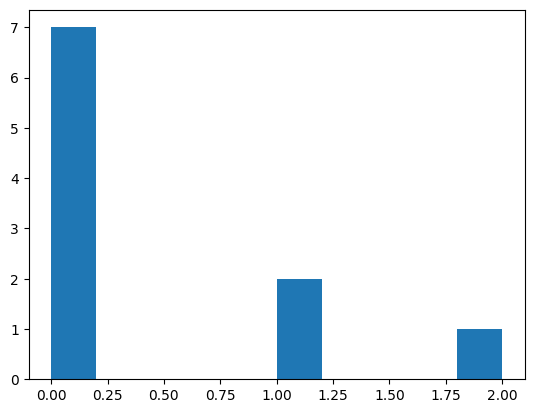

In [63]:
x, y = genetic_algorithm(10, 50, 50*5) #1/n
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

در این حالت همان شرایط قبل را در حالی که جهش ۰.۲ است بررسی می کنیم.

مشاهده می شود که پاسخ ها بدتر شده اند.

[1 1 1 1 0 0 1 1 0 1]
[ 8  6  9  3  1  4  7 10  2  5]


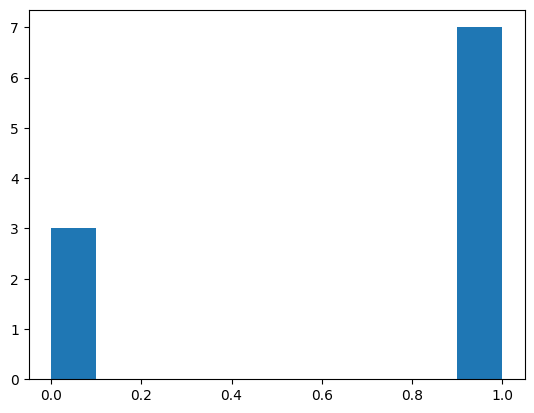

In [65]:
x, y = genetic_algorithm(10, 50, 50*5) #0.2
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

در این حالت جهش برابر ۰.۵ است و شرایط کمی بهتر شده است.

[1 0 0 1 1 0 1 1 1 0]
[ 6  3  9  2  5  8 10  7  4  1]


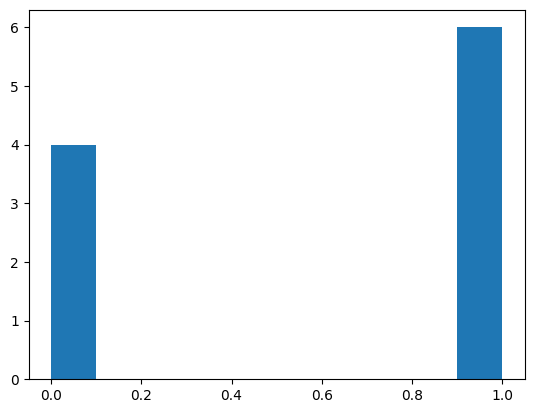

In [66]:
x, y = genetic_algorithm(10, 50, 50*5) #0.5
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

در اینجا برای ۱۰۰ وزیر با جمعیت اولیه ۸۰ امتحان می کنیم که به نسبت پاسخ ها خوب است

[2 1 0 0 2]
[ 37  45   1  68  13  29  16  85  49  79  97  39  69  47  88  28  67  24
  80  21  35  89  94  77  30  41  48   9  58  82  15  54  61  11  70  98
  20  32  93  33  44  46  10  81  18  90  86  95 100  26  75  12  84  96
  23   4  59  55  76  60   5  34  17   7  83   3  56  78  40  52   6  42
  25  65  22  62  51  53  36  99  71  74   8  63  72  14  43  19  38   2
  27  50  92  57  73  91  66  31  87  64]


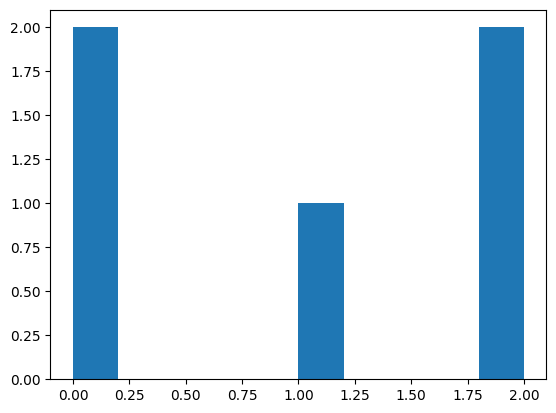

In [68]:
x, y = genetic_algorithm(100, 80, 80*5, 5) #1/n
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

حال با جمعیت اولیه ۱۲۰ امتحان می کنیم. پاسخ ها کمی بدتر شده اند

[0 1 2 1 1]
[ 28  55  48  36  61  68  85  13  18  74  92  31  29  65  45  89  51  10
  76  95  44  30  77  46  94  27  37   6  87   1  67  39  93  97  59  71
  52  84  23  33  72  38  32   3  63  41  22  96  14  64  25  99   8  57
  80  82  98   9  70  12  40  34  43  26  21  16  53  81  73  69  20  60
   5   7   2  17  50  47  91 100  66  35  83  90  49  62  54  42  79  19
  78  58   4  88  86  56  15  75  11  24]


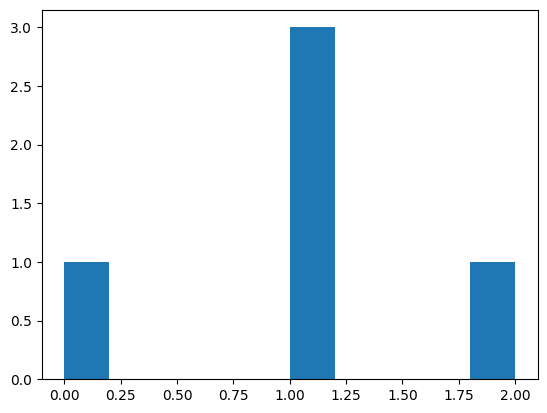

In [69]:
x, y = genetic_algorithm(100, 120, 80*5, 5) #1/n
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

بنابراین ۸۰ جمعیت مناسبی بود. حال جهش را دوباره روی ۰.۲ می گذاریم که نشان می دهد شرایط بهتر نشده.

[1 3 1 2 2]
[ 83  77  24  21  33  30  81  53  12  43  36  51  54  66  72  16   9  34
  23  76  44  84   5  32  93  87  18  86  10  42  85   2  17  41 100  91
  56  47  71  58  19  78  80  55  64  11  60  99  46  27  57  38  73  28
  89  98  26  88  97  61  96  14  90  74   4   7  69  13  25  63   3   6
  31  37  62  52  65   8  50  95  70  48  29  79  40  59  35  15  94  75
   1  82  22  45  39  68  20  92  67  49]


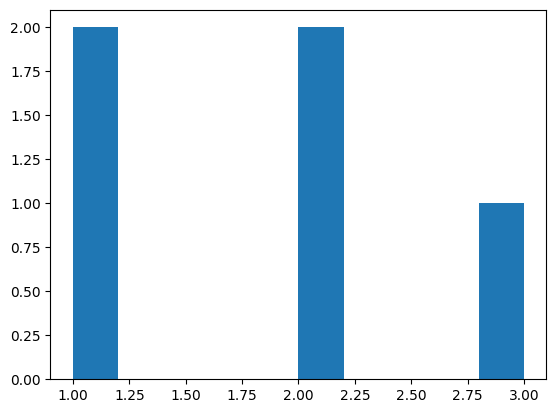

In [71]:
x, y = genetic_algorithm(100, 80, 80*5, 5) #0.2
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

حال جمعیت اولیه را کاهش داده و همچنین جهش را روی ۰.۵ می گذاریم.
مشخص می شود که تا اینجا بهترین جواب برای ۱۰۰، جمعیت اولیه ۸۰ و جهش 

1/n

بوده است

[3 4 1 2 2]
[ 72  25  62  21   4  17  15  84  55  23  40  30  43  95  89  59  24  45
  53  88  79  71  63  10  58  22   3  12  56  86  36  94  99  78  44  46
  68  42  80  28  73  92  35  18 100  11   2  83  32  39  51  49  67  33
   6  77  81  19   7  37  54  14  66  76  31  57  93  96  85   1  91  70
  75  20  69  82  48  50  98  61  41  97   5  27  65  87  16  29  74   9
  64  26  13  52  90  34  60  38   8  47]


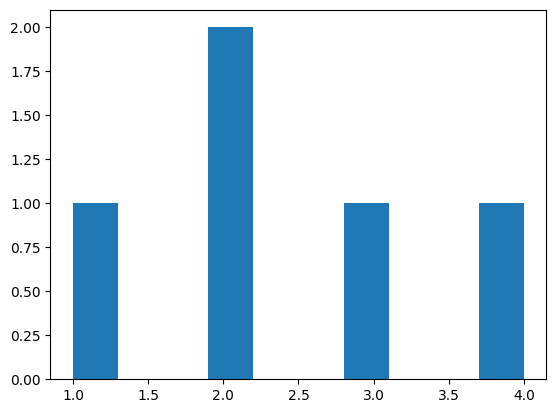

In [72]:
x, y = genetic_algorithm(100, 64, 80*5, 5) #0.5
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

شرایط توقف را بالاتر می بریم که نشان می دهد شرایط کمی بهتر می شود

[2 1 1]
[ 45  17  55  36  13  82  40  96  74  47  85  19  16  68  49  78  84  27
   5  83  15  41  37  44  97  79  43  11  30  86   3  58  23   8  76  48
  12  33  61  57  28  70  31  75  69  91  94   2  95  92 100  54  80  38
  66  29  20  88  59  53  99  67  73  93  42  64  56  18   6  50   9  90
  98  21  60  72  10  77  14  63  46  26  32  25  89  52   4  22  35  71
  62   7  24  34  87  51   1  65  81  39]


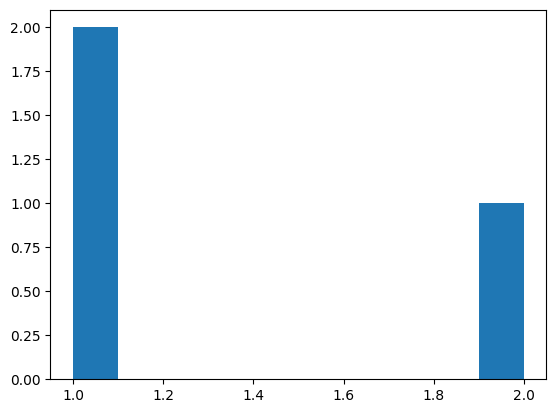

In [73]:
x, y = genetic_algorithm(100, 80, 500, 3) #0.2
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

حال برای ۲۰۰ وزیر امتحان می کنیم که جواب نسبتا خوب با تنها ۱ تهدید می دهد. احتمالا اگر کمی تعداد نسل ها و همچنین جمعیت اولیه را افزایش دهیم، به تهدید صفر می رسیم

[1]
[ 74 104 200  75 132  54  15 108 165 133  88 115 188  60 135 163  14 175
 157 106  34 156  97 186  13  38 142 134 105 131 141  72 147  51  82  67
  63  56 136  81  99 167 183 127  69 196  33 117  29  59  12  41  28 116
   2  55 189 128  92   8 112 155  25 151 125  16  10 184  83 154  58 124
  73 187  35  47 107   5 174 199 113 181 162  17 146  77  43   4  44 126
  37  66 185 150  30  40 160 123 109 194  94 198  45 158  87  65 111 143
  26 144  80 180   6  84 153 191  27 177  48  18  36  42  96 161 164 190
 171  19 119  98  23 148  22 101  76  20  68 103 166 168  79   7  64  24
  52 130 197 170 152   3  85  61 129  31  78  46 120 169 138  21  39 140
 102 193 118  90 159 145 176  70 122  86 139 114  57   1 178   9 173 110
  62  32  91  50 121 182 172  11  95  49 149  89 195 192  71 179  53  93
 100 137]


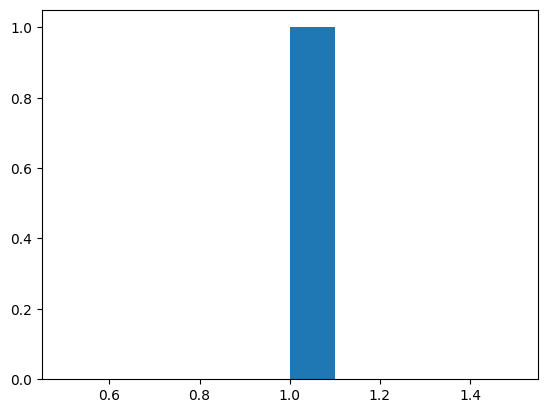

In [74]:
x, y = genetic_algorithm(200, 80, 600, 1) #0.2
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

حال برای ۵۰۰ وزیر امتحان می کنیم

[31]
[444 280  10 294 330 399 115 267 355 400 232 180 122 218  73 155 290  50
 234 379 321  82 186 385 179 300 222 455 249 377 427  98 384 332  45  85
 244 404 264 421 229 135 334  17 245 258 191  57 182  22 433 199 478 315
 228 128 102 299 381  49 314  88 311 476 136 389 496 151 205 440  25 197
 482 353  58 309 358 442 474  43 273  42 257 395 282  29  21 405 425  28
 453 223  24 347 329 175 144 285 319 123 327 193 398 143 462 382 301 434
 227 348 426 492 164 364 458 149 471 387 456  72  66 450 306 239 195 307
  26 357 214 418 420 340 349 305 392 337 212  68 150 160 297  33 484 206
 446 325 211 255 237 167  79 213 408 460 161  65 241 351 171  75 491  46
 345 129  55 158  15 296 153  63 166 119 438 413 486 423  16 490  81 221
  41 220 185 390 336 432 110 374  53 266 283  37 207 328 259 489 449 114
 225  27  62 430  76  84 101 383   4 295 493   2  83 203 388  30  69 190
 375 138 178 366 445 154 323  34  14  31 354 464 217  20   3 481 226 104
 373 341 435 316 302 498  11  89 494 443   9 4

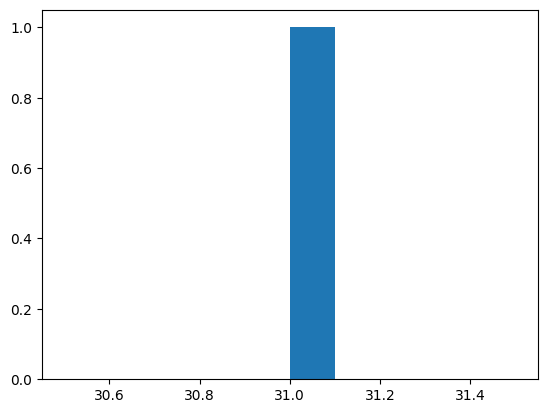

In [75]:
x, y = genetic_algorithm(500, 80, 800, 1) #0.2
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()

تعداد تهدید حالت قبل زیاد بود، به همین علت با جهش 

1/n

امتحان می کنیم. اما مشاهده می کنیم که احتمال جهش ۰.۲ نتیجه بهتری دارد.

[200]
[462 327 402  29  31 100 473 420  76 150 278 415 472 363 283 212  81 328
 272 148 378  86 173 181  34 395  84 276 203 127 409 164 233 293 252 456
 125  59 284 248 323 180 141  82 483 105  20 129 265 139 354 296 450 282
 256 393 239 464 227 445  17 353 175 424 453 399  63 345 258 497 356 297
 333 364 496 123 147 376 299 411 214   6 188 447 444  53 358 116 403  16
 292 484 111 224 338 102 365 384 371 177 221 482 488 330 157  11 285 321
 441 172 440 306 413 144 455 301 113  79  36 414   3 199 459 366  89 240
 405 140  74 171 357 476  77 344 368 110  80 442  23 372 425  44 223 360
 254  67   2 457  26  90 269 209 156 314 491 383  87  64 500 130  71 416
 470 379 396 117 257 370  12 238 288  98 229 485 262 237 322 270 390 225
 174 437 312 153 433 428  51  85 386 492 302 352 208 131 320 436  22  15
  25 246 410  66 146 308  47 170 346 222 167 391 160 317 169 329  50 202
 290 151 101 120 132 351 277 249 185 109 341 397 154  37 289 451 271 253
  78 137 325  52 461 493 392  10 349 251  68 

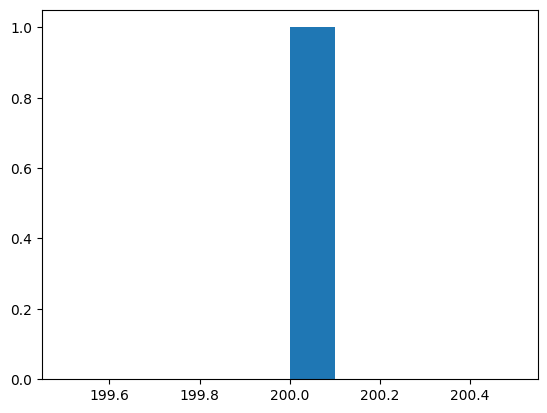

In [79]:
x, y = genetic_algorithm(500, 80, 800, 1) #1/n
print(x)
print(y[np.where(x == min(x))[0][0]])
plt.clf()
plt.hist(x)
plt.show()